In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


Üstte bize verilen çıktıyı aşağıda read.csv içine koyarak datasetimizin okunmasını ve df değişkenine atanmasını sağlıyoruz. Böylece veri setimiz notebook'a yüklenmiş ve kullanıma hazır hale gelmiş oluyor.

In [7]:
df = pd.read_csv('/kaggle/input/the-movies-dataset/ratings.csv')

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Proje boyunca kullanmam gereken kütüphanelerin bazılarını importluyorum , ilerleyen kodlarda kullanıcam. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


info methodu verisetimizin genel bilgileri hakkında bize bilgiler verir. Veri tipi , kullanılan memory alanı gibi... Seçtiğim veri setimde filmlere oy veren kullanıcıların idlerinin bulunduğu bir integer sütunu , oylanan filme ait idnin bulunduğu integer sütunu , float olarak oylanan bir rating sütunu ve oylamada geçen süreyi belirten timestamp sütunu görüyorum.

In [12]:
df.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


describe methodu verisetimiz hakkında istatistiksel bilgi almamızı sağlar.

In [13]:
df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


head methodu verisetimizin ilk 5 satırını örnek olarak görmemizi sağlar. 

In [14]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

isnull methoduyla verisetimde herhangi bir null var mı diye kontrol ettim ve mükemmeldir ki yok. O yüzden fazladan herhangi bir algoritma kullanarak temizlik yapmama gerek kalmadı.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


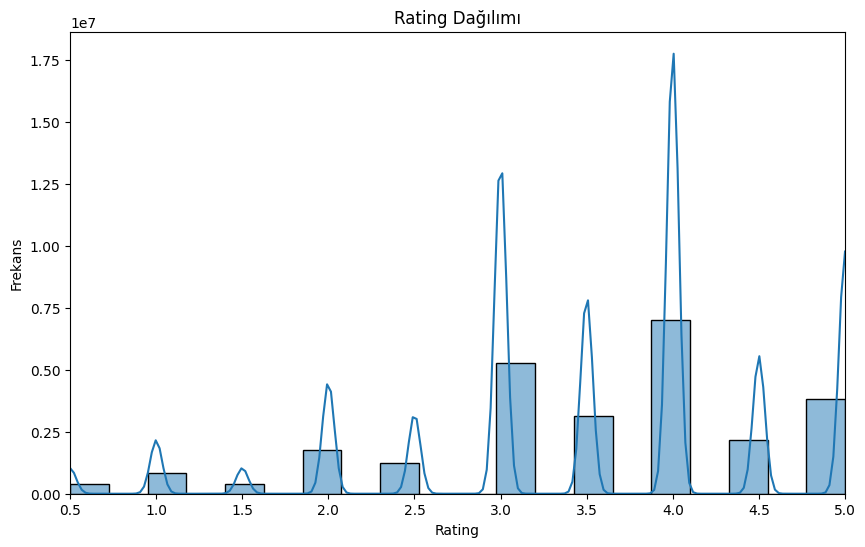

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)  
plt.title('Rating Dağılımı')
plt.xlabel('Rating')
plt.ylabel('Frekans')
plt.xlim(0.5, 5.0) 
plt.show()

Burada verilerimi ratinge göre görselleştirdim. 0.0 ve 5.0 arasında her ratingten kaç tane olduğunu gösteren bir görsel ortaya çıktı. Ancak burada bir sorun alıyorum seaborn kütüphanesinin yeni bir güncelleme istediğine dair sanırım , bunu nasıl çözebileceğimi bulamadım. Ama görselleştirme işlemi başarılı oldu.

# Gözetimli Öğrenme (Linear Regression)

Ben bu datasette ratinglerin kullanıcıya ve filme genel karşılaştırılmasını ve beğenilme oranlarına göre ilerideki filmlerin nasıl puanlanabileceğini öğretmeyi hedefliyorum o yüzden linear regression ile modelimi eğitmek istedim.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error

X = df[['userId', 'movieId']] 
y = df['rating']  

Burada x ve y değişkenlerimi tanımlıyorum. y öğretmemiz gereken hedef değişkenimiz olduğu için raytingi ona atıyorum.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Datasetimi train ve test için böldüm , %20si test kümesi olarak ayrıldı.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

Linear regression uygulayarak x ve y arasındaki ilişkiyi modelleyip modeli eğitiyorum.

In [21]:
y_pred = model.predict(X_test)

Burada test değişkeniyle modelimizin tahminler yapmasını sağlıyorum.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"Ortalama Mutlak Hata (MAE): {mae}")
print(f"R² Skoru: {r2}")

Modelimin performansını buradaki fonksiyonlarla değerlendirdim 

# GÖZETİMSİZ ÖĞRENME (K-means)

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10 , random_state=42)
df['cluster'] = kmeans.fit_predict(X)

Aynı linear regressionda olduğu gibi burada da modelimizi eğitiyoruz.

In [ ]:
sample_df = df.sample(n=10000, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='userId', y='movieId', hue='cluster', data=df, palette='viridis', alpha=0.5)
plt.title('K-means Kümeleme Sonuçları')
plt.xlabel('Kullanıcı ID')
plt.ylabel('Film ID')
plt.legend().remove()
plt.show()

Oluşturduğum kümeleri görselleştiriyorum , burada veri sayımın çok olmasından dolayı legend yerleşimi çok büyük zaman aldığı ve error verdiği için kaldırmak zorunda kaldım.

Yukarıdaki kod dataset çok büyük olduğundan bir türlü çalışmayı bitiremedi ve devamını da çalıştırmama izin vermedi. GPU eklememe de izin vermedi genel anlamda.Bu yüzden de verisetimi bir alt kümeye bölerek kullanmak zorunda kaldım. 

In [ ]:
cluster_summary = df.groupby('cluster').agg({
    'userId': 'nunique', 
    'movieId': 'nunique' 
})

print(cluster_summary)

Burada her küme için bilgileri sınıflandırıyor ve yazdırıyorum.

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='rating', hue='cluster', multiple='stack', palette='viridis', bins=20)
plt.title('Küme İçindeki Rating Dağılımı')
plt.xlabel('Rating')
plt.ylabel('Frekans')
plt.show()

Kümeler için rating dağılımını görselleştiriyorum.

# Hiperparametre Optimizasyonu 

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("En İyi KNN Parametreler:", grid_search.best_params_)
print("En İyi KNN Skor:", grid_search.best_score_)

En iyi hiperparametreler bulup modeli eğitiyorum. Sonrasında da parametreleri ve skorları yazdırıyorum.

In [ ]:
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

En iyi model ile tahmini yapıyorum.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Karışıklık Matrisi:\n", conf_matrix)
print(f"KNN Doğruluk: {accuracy}")
print(f"KNN Kesinlik: {precision}")
print(f"KNN Duyarlılık: {recall}")
print(f"KNN F1 Puanı: {f1}")

Yukarıdaki fonksiyonları kullanarak modellerin performans değerlendirilmesi yapılıyor.